# 1D Chain Model

In this notebook, we begin to investigate the Anderson model through the simulation of the d= 1
 case.

In [75]:
# Init a 2D periodic lattice of n^2 atoms:
import numpy as np

n = 10
chain = np.zeros((n, n))

In [76]:
#chain: physical model
# epsilon is the control parameter for randomness
# T controls the hopping

import networkx as nx

def _hamiltonian(chain, epsilon, T):
    H = epsilon * np.identity((len(chain))**2)
    G = nx.grid_graph(dim = (n, n), periodic=True)
    A = nx.to_numpy_array(G)
    H -= T * A
    
    return H



The Hamiltonian is given by:

$$\hat{H} = \epsilon_0 \delta_{n, m} - t (\delta_{n+1, m} + \delta_{n-1, m})$$

In [77]:
H = _hamiltonian(chain, 0, 1)

In [78]:
# Found the eigenvalues and eigenvectors of the Hamiltonian (energies, and energy eigenstates)
np.linalg.eigh(H)

(array([-4.00000000e+00, -3.61803399e+00, -3.61803399e+00, -3.61803399e+00,
        -3.61803399e+00, -3.23606798e+00, -3.23606798e+00, -3.23606798e+00,
        -3.23606798e+00, -2.61803399e+00, -2.61803399e+00, -2.61803399e+00,
        -2.61803399e+00, -2.23606798e+00, -2.23606798e+00, -2.23606798e+00,
        -2.23606798e+00, -2.23606798e+00, -2.23606798e+00, -2.23606798e+00,
        -2.23606798e+00, -1.38196601e+00, -1.38196601e+00, -1.38196601e+00,
        -1.38196601e+00, -1.23606798e+00, -1.23606798e+00, -1.23606798e+00,
        -1.23606798e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -3.81966011e-01, -3.81966011e-01, -3.81966011e-01,
        -3.81966011e-01, -2.45230759e-15, -1.60304537e-15, -1.55945670e-15,
        -1.15316389e-15, -9.37141843e-16, -6.06627582e-16, -4.49198734e-16,
        -1.66451151e-16, -1.06816011e-16, -2.85845587e-17,  1.62260505e-17,
         4.7

In [79]:
# Assume that the initial state is the ground state.
from scipy.linalg import expm
def __time_evolution(H, t):
    return expm(-1j * H * t)

psi_0 = np.zeros(n**2)
psi_0[n**2//2] = 1

In [80]:
end_time = 10
history = []
for step in range(end_time):
    psi_t = __time_evolution(H, step) @ psi_0
    history.append(psi_t)

0.9999999999999996

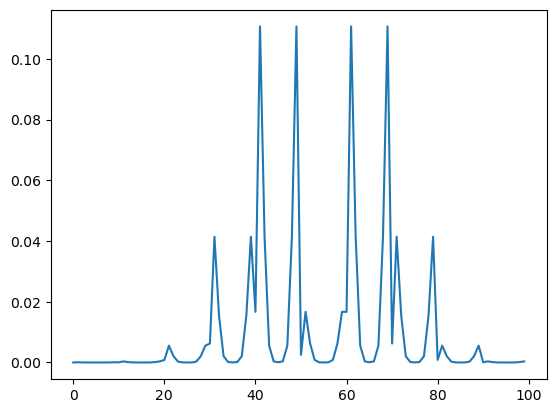

In [81]:
import matplotlib.pyplot as plt

#plt.plot(history[1].T.conj() @ history[1])
density = np.real(np.multiply(history[1].conj(), history[1]))
plt.plot(density)
sum(density)
#for wavefunction in history:
#    plt.plot(np.linalg.norm(wavefunction))

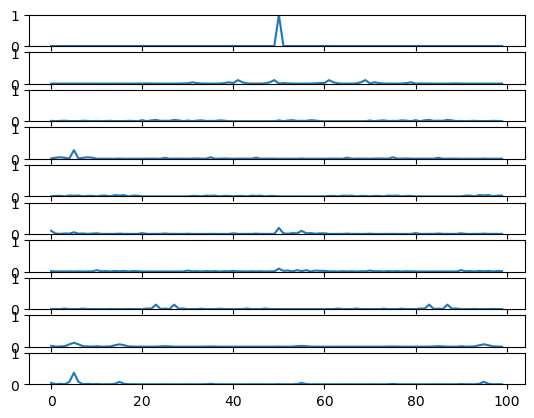

In [82]:
fig, axs = plt.subplots(10)
for i, ax in enumerate(axs):
    density = np.real(np.multiply(history[i].conj(), history[i]))
    ax.plot(density)
    ax.set_ylim(0, 1)
    sum(density)

#So this was for the nonlocalized part

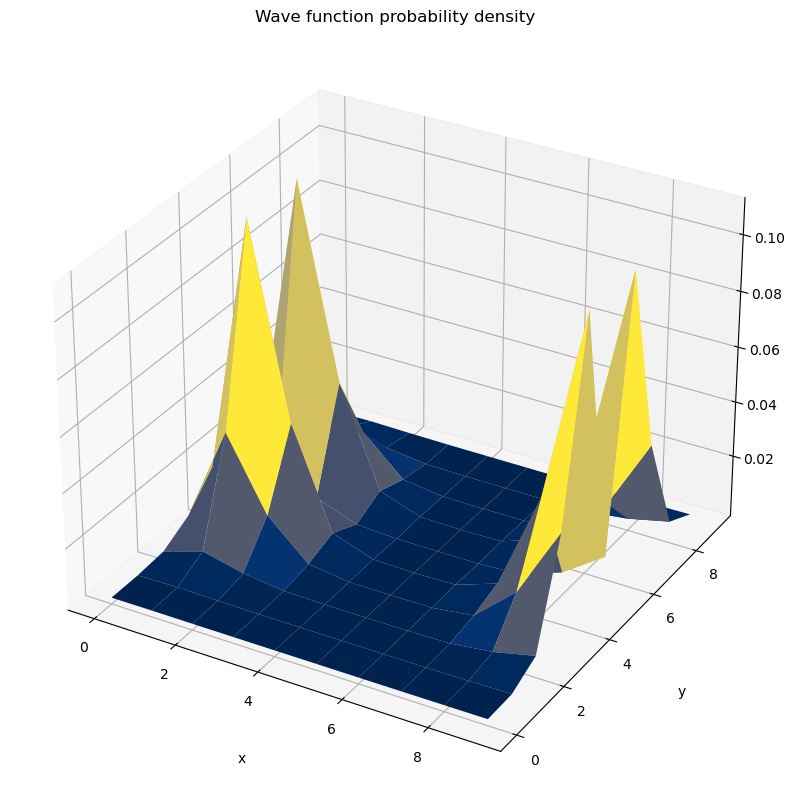

In [65]:

eps = 100

H = _hamiltonian(chain, eps, 1)

psi_0 = np.zeros(n**2)
psi_0[n**2//2] = 1

end_time = 10
history = []
for step in range(end_time):
    psi_t = __time_evolution(H, step) @ psi_0
    history.append(psi_t)


density = np.real(np.multiply(history[1].conj(), history[1]))
dens2d = np.reshape(density, (n, n))



fig = plt.figure(figsize = (12,10))

ax = plt.axes(projection='3d')
x = np.arange(0, n, 1)
y = np.arange(0, n, 1)
X, Y = np.meshgrid(x, y)

surf = ax.plot_surface(X, Y, dens2d, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('P', labelpad=20)
ax.set_title("Wave function probability density")

#fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()




#plt.plot(dens2d)
#sum(density)
#for wavefunction in history:
#    plt.plot(np.linalg.norm(wavefunction))

#fig, axs = plt.subplots(10)
#for i, ax in enumerate(axs):
    #density = np.real(np.multiply(history[i].conj(), history[i]))
    #ax.plot(density)
    #ax.set_ylim(0, 1)
    #sum(density)


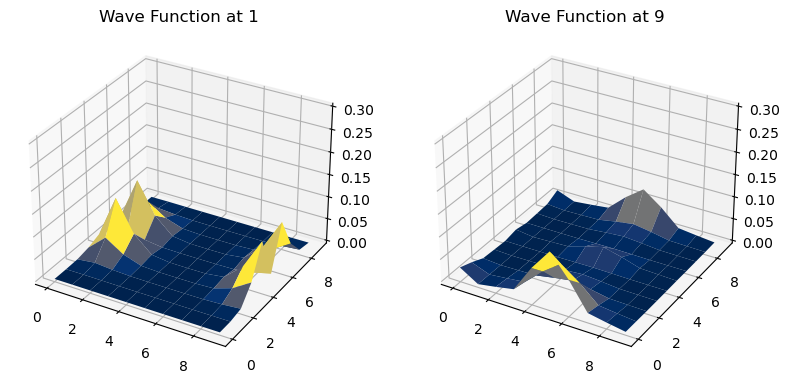

In [74]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

x = np.arange(0, n, 1)
y = np.arange(0, n, 1)
X, Y = np.meshgrid(x, y)
dens1 = (np.real(np.multiply(history[1].conj(), history[1]))).reshape((n, n))
surf = ax.plot_surface(X, Y, dens1, cmap=plt.cm.cividis)
ax.set_zlim(0, 0.3)
ax.set_title("Wave Function at 1")

ax = fig.add_subplot(1, 2, 2, projection='3d')
dens2 = (np.real(np.multiply(history[8].conj(), history[8]))).reshape((n, n))
surf = ax.plot_surface(X, Y, dens2, cmap=plt.cm.cividis)
ax.set_zlim(0, 0.3)
ax.set_title("Wave Function at 9")

plt.show()

In [176]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.linalg import expm

class AndersonLattice:
    '''
    Construct and simulate a 2D Anderson lattice with periodic boundary conditions.
    We represent all wave functions and operators in the lattice site basis. 

    Attributes
        chain (2D ndarray NxN): 
        psi0 (1D ndarray N^2): 
        eps_range (array-like):
        t_hop (float):
        store_history (boolean):
    '''
    def __init__(self, num_sites, psi0, eps_range, t_hop, store_history=True):
        self.chain = np.zeros((num_sites, num_sites))
        self.num_sites = num_sites
        self.psi0 = psi0
        self.eps_range = eps_range
        self.t_hop = t_hop # hopping param

        if store_history:
            self.history = []

    def _hamiltonian(self):
        '''
        Construct the hamiltonian for the Anderson tight-binding model, a matrix representation in the occupancy site basis. 
        '''
        binding = np.diagflat(np.random.uniform(*self.eps_range, size=(self.num_sites**2)))
        G = nx.grid_graph(dim = (self.num_sites, self.num_sites), periodic=True)
        A = nx.to_numpy_array(G)
        hopping = -1*self.t_hop * A

        return binding + hopping
    
    
    def _time_evolution(self, time):
        '''
        Calculate the unitary time evolution operator for the given hamiltonian.

        Args
            time (float): time when time evolution operator is calculated

        Returns
            U(t) (ndarray of size num_sites x num_sites) 
        '''

        return expm(-1j * self._hamiltonian() * time)
    
    
    def solve(self, t, nt): #t_steps):
        '''
        Calculate psi(t). 

        Args
            t (array-like): time range of form (t_initial, t_final)
            nt (int): number of time steps
        '''        

        times = np.linspace(0, t, nt)
        
        history = []

        for time in times:
            psi_t = self._time_evolution(time) @ psi_0
            history.append(psi_t) 
        
        return history
    
    def plotdensity(self, t, axisstabilized = False):
        '''
        Plot the probability density, aka |psi(t)|^2

        Args:
            t (float): time to plot it
        '''

        psi_t = self._time_evolution(t) @psi_0
        density = np.real(np.multiply(psi_t.conj(), psi_t))
        dens2d = np.reshape(density, (n, n))

        fig = plt.figure(figsize = (12,10))

        ax = plt.axes(projection='3d')
        x = np.arange(0, n, 1)
        y = np.arange(0, n, 1)
        X, Y = np.meshgrid(x, y)

        surf = ax.plot_surface(X, Y, dens2d, cmap = plt.cm.cividis)

        # Set axes label
        ax.set_xlabel('x', labelpad=20)
        ax.set_ylabel('y', labelpad=20)
        ax.set_zlabel('P', labelpad=20)
        if axisstabilized==True:
            maxy = max(dens2d.flatten())
            ax.set_zlim((0, max(maxy, 0.2)))
        ax.set_title("Wave function probability density at time " + str(t))

        #fig.colorbar(surf, shrink=0.5, aspect=8)

        plt.show()

class RandomGraph:
    '''
    Construct and simulate a random graph.
    We represent all wave functions and operators in the lattice site basis. 

    Attributes
        chain (2D ndarray NxN): 
        psi0 (1D ndarray N^2): 
        eps_range (array-like):
        t_hop (float):
        store_history (boolean):
    '''
    def __init__(self, p, num_sites, psi0, eps_range, t_hop, store_history=True):
        self.chain = np.zeros((num_sites, num_sites))
        self.num_sites = num_sites
        self.psi0 = psi0
        self.eps_range = eps_range
        self.t_hop = t_hop # hopping param
        self.p = p
        self.G = nx.erdos_renyi_graph(self.num_sites, self.p)

        if store_history:
            self.history = []


    def _hamiltonian(self):
        '''
        Construct the hamiltonian for the Anderson tight-binding model, a matrix representation in the occupancy site basis. 
        but with a random graph instead with probability p
        '''
        binding = np.diagflat(np.random.uniform(*self.eps_range, size=self.num_sites))
        A = nx.to_numpy_array(self.G)
        hopping = -1*self.t_hop * A

        return binding + hopping
    
    def _time_evolution(self, time):
        '''
        Calculate the unitary time evolution operator for the given hamiltonian.

        Args
            time (float): time when time evolution operator is calculated

        Returns
            U(t) (ndarray of size num_sites x num_sites) 
        '''

        return expm(-1j * self._hamiltonian() * time)
    
    
    def solve(self, t, nt): #t_steps):
        '''
        Calculate psi(t). 

        Args
            t (array-like): time range of form (t_initial, t_final)
            nt (int): number of time steps
        '''        

        times = np.linspace(0, t, nt)
        
        history = []

        for time in times:
            psi_t = self._time_evolution(time) @ psi_0
            history.append(psi_t) 
        
        return history
    
    def plotgraph(self):
        nx.draw(self.G)

    def plotdensity(self, t, axisstabilized = False):
        '''
        Plot the probability density, aka |psi(t)|^2

        Args:
            t (float): time to plot it
        '''

        fig = plt.figure(figsize = (12,10))
        psi_t = self._time_evolution(t) @psi_0
        density = np.real(np.multiply(psi_t.conj(), psi_t))
        nodelist = self.G.nodes
        psidict = {}
        i = 0
        for n in nodelist:
            psidict[n] = psi_t[i]
            i += 1
        #nx.set_node_attributes(self.G, psidict)
        plt.title("Wave function probability density at time " + str(t) +"\n p = " + str(self.p))
        pos = nx.spring_layout(self.G)
        nx.draw(self.G, pos, node_color = density, cmap = plt.cm.cividis)
        
        sm = plt.cm.ScalarMappable(cmap=plt.cm.cividis, norm=plt.Normalize(vmin = min(density), vmax=max(density)))
        plt.colorbar(sm)
        plt.show()
        


        #fig = plt.figure(figsize = (12,10))

        #ax = plt.axes(projection='3d')
        #x = np.arange(0, n, 1)
        #y = np.arange(0, n, 1)
        #X, Y = np.meshgrid(x, y)

        #surf = ax.plot_surface(X, Y, dens2d, cmap = plt.cm.cividis)

        # Set axes label
        #ax.set_xlabel('x', labelpad=20)
        #ax.set_ylabel('y', labelpad=20)
        #ax.set_zlabel('P', labelpad=20)
        #if axisstabilized==True:
        #    maxy = max(dens2d.flatten())
        #    ax.set_zlim((0, max(maxy, 0.2)))
        #ax.set_title("Wave function probability density at time " + str(t))

        #fig.colorbar(surf, shrink=0.5, aspect=8)

        #plt.show()




    

In [132]:
n = 30
psi_0 = np.zeros(n**2)
psi_0[n**2//2] = 1
torus = AndersonLattice(n, psi_0, [-1, 1], 1)

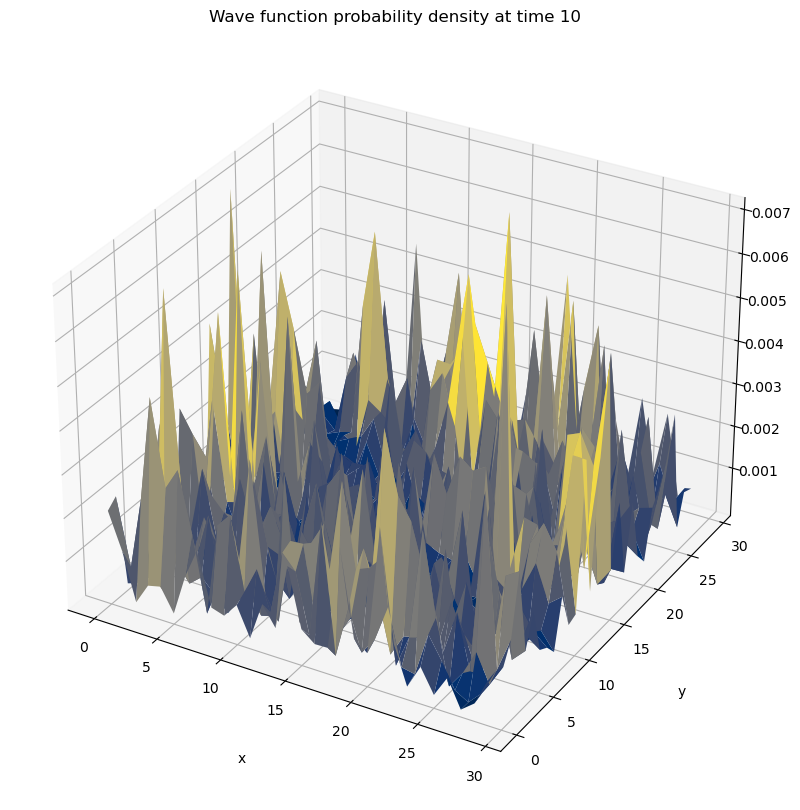

In [133]:
history = torus.solve(10, 10)
plotty = torus.plotdensity(10)

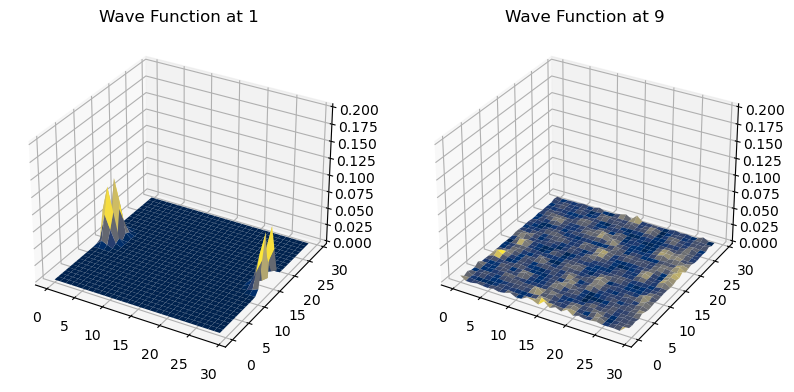

In [134]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

x = np.arange(0, n, 1)
y = np.arange(0, n, 1)
X, Y = np.meshgrid(x, y)
dens1 = (np.real(np.multiply(history[1].conj(), history[1]))).reshape((n, n))
surf = ax.plot_surface(X, Y, dens1, cmap=plt.cm.cividis)
maxy1 = max(dens1.flatten())
ax.set_zlim(0, max(maxy1, 0.2))
ax.set_title("Wave Function at 1")

ax = fig.add_subplot(1, 2, 2, projection='3d')
dens2 = (np.real(np.multiply(history[8].conj(), history[8]))).reshape((n, n))
surf = ax.plot_surface(X, Y, dens2, cmap=plt.cm.cividis)
maxy2 = max(dens2.flatten())
ax.set_zlim(0, max(maxy2, 0.2))
ax.set_title("Wave Function at 9")

plt.show()

/var/folders/8k/00npw51s0j9_531k7wghct_r0000gn/T/ipykernel_26372/1741056249.py:202: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


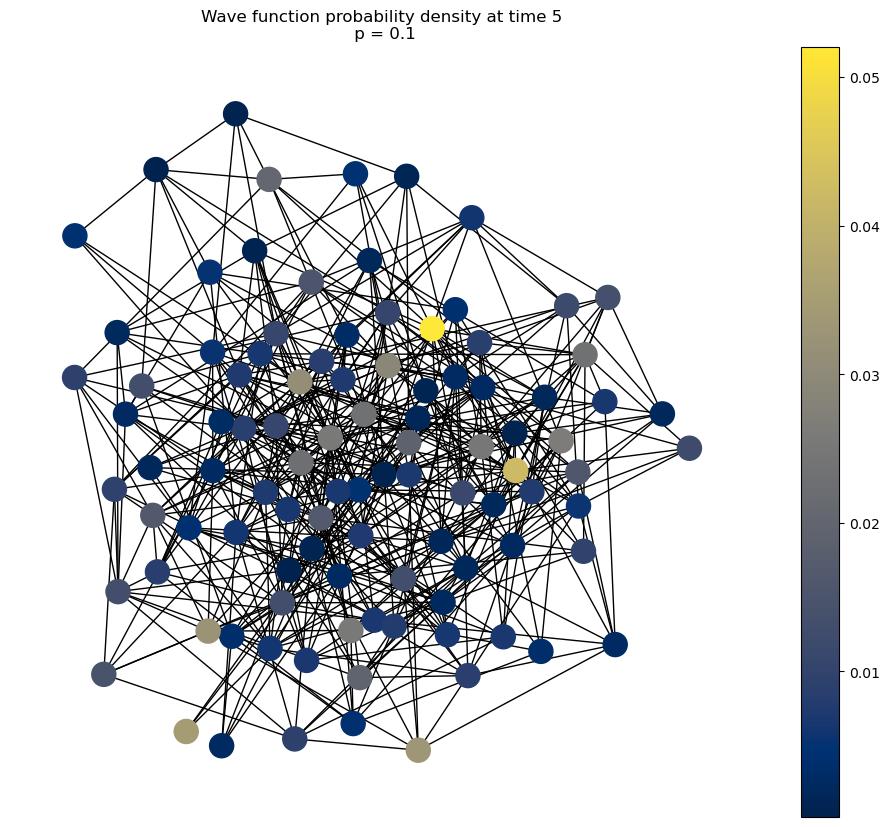

In [179]:
n = 100
psi_0 = np.zeros(n)
psi_0[n//2] = 1
graphy = RandomGraph(0.1, n, psi_0, [-1, 1], 1)
history = graphy.solve(10, 10)
plotty = graphy.plotdensity(5)